<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/py23_gapminder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. GitHub에 저장된 gapminder.tsv 파일을 읽고 DataFrame을 생성
1. 데이터 프레임 탐색
1. (중복되지 않는) 국가 이름의 개수?
1. (중복되지 않는) 대륙 이름?
1. 중복되지 않는) 연도의 개수?
1. 국가이름, 연도, 1인당 GDP 컬럼을 선택
1. 1인당 GDP의 최댓값, 최솟값을 찾고, 그 row를 출력
1. 기대수명(lifeExp)의 최솟값과 최댓값을 찾고, 그 row를 출력
1. 연도별 기대수명의 평균을 출력하고 시각화
1. 연도별 1인당 GDP의 평균을 출력하고 시각화
1. 연도별 대륙별 전세계 인구를 출력하고 시각화

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
file_path='https://github.com/JakeOh/202110_itw_lab_python/raw/main/gapminder.tsv'

In [29]:
# CSV(Comma-Separated Values), TSV(Tab_Separated Values)
gapminder = pd.read_csv(file_path, sep='\t')

In [32]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [34]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [35]:
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [36]:
# 숫자 타입 변수들의 기술 통계량
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


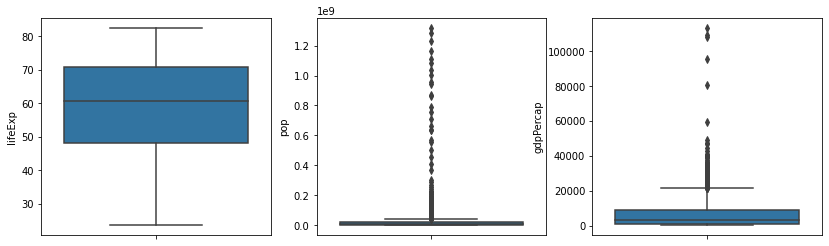

In [46]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 4))

sns.boxplot(y='lifeExp', data=gapminder, ax=ax[0])
sns.boxplot(y='pop', data=gapminder, ax=ax[1])
sns.boxplot(y='gdpPercap', data=gapminder, ax=ax[2])


plt.show()

In [48]:
len(gapminder['country'].unique())

142

In [50]:
# 대륙 이름 개수
len(gapminder['continent'].unique())

5

In [51]:
gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [52]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [53]:
# fancy indexing - 여러개의 컬럼을 함께 선택하는 방법.
gapminder[['country', 'year', 'gdpPercap']]

,country,year,gdpPercap
0,Afghanistan,1952,779.445314
1,Afghanistan,1957,820.853030
2,Afghanistan,1962,853.100710
3,Afghanistan,1967,836.197138
4,Afghanistan,1972,739.981106
...,...,...,...
1699,Zimbabwe,1987,706.157306
1700,Zimbabwe,1992,693.420786
1701,Zimbabwe,1997,792.449960
1702,Zimbabwe,2002,672.038623


In [56]:
# 1인당 GDP 최솟값
gapminder['gdpPercap'].min()

241.1658765

In [57]:
# 1인당 GDP 최댓값
gapminder['gdpPercap'].max()

113523.1329

In [60]:
# 1인당 GDP 최솟값인 행과 최댓값인 행 - boolean indexing(&, |, ~)
gapminder[(gapminder['gdpPercap']==gapminder['gdpPercap'].min()) | 
           (gapminder['gdpPercap']==gapminder['gdpPercap'].max())]

,country,continent,year,lifeExp,pop,gdpPercap
334,"Congo, Dem. Rep.",Africa,2002,44.966,55379852,241.165876
853,Kuwait,Asia,1957,58.033,212846,113523.132900


In [61]:
# 기대 수명 최솟값, 최댓값인 행
gapminder[(gapminder['lifeExp'] == gapminder['lifeExp'].min()) |
          (gapminder['lifeExp'] == gapminder['lifeExp'].max())]

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.068060
1292,Rwanda,Africa,1992,23.599,7290203,737.068595


In [62]:
# Japan의 기대 수명 연도별 그래프
japan = gapminder[gapminder['country'] == 'Japan']
japan

,country,continent,year,lifeExp,pop,gdpPercap
792,Japan,Asia,1952,63.030,86459025,3216.956347
793,Japan,Asia,1957,65.500,91563009,4317.694365
794,Japan,Asia,1962,68.730,95831757,6576.649461
795,Japan,Asia,1967,71.430,100825279,9847.788607
796,Japan,Asia,1972,73.420,107188273,14778.786360
797,Japan,Asia,1977,75.380,113872473,16610.377010
798,Japan,Asia,1982,77.110,118454974,19384.105710
799,Japan,Asia,1987,78.670,122091325,22375.941890
800,Japan,Asia,1992,79.360,124329269,26824.895110
801,Japan,Asia,1997,80.690,125956499,28816.584990


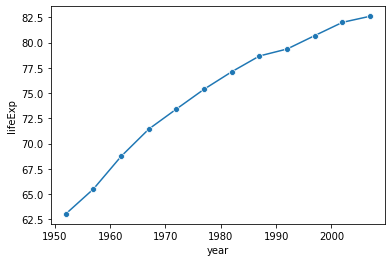

In [73]:
sns.lineplot(x='year', y='lifeExp', data=japan, marker='o')
plt.show()

In [69]:
rwanda = gapminder[gapminder['country'] == 'Rwanda']
rwanda

,country,continent,year,lifeExp,pop,gdpPercap
1284,Rwanda,Africa,1952,40.000,2534927,493.323875
1285,Rwanda,Africa,1957,41.500,2822082,540.289398
1286,Rwanda,Africa,1962,43.000,3051242,597.473073
1287,Rwanda,Africa,1967,44.100,3451079,510.963714
1288,Rwanda,Africa,1972,44.600,3992121,590.580664
1289,Rwanda,Africa,1977,45.000,4657072,670.080601
1290,Rwanda,Africa,1982,46.218,5507565,881.570647
1291,Rwanda,Africa,1987,44.020,6349365,847.991217
1292,Rwanda,Africa,1992,23.599,7290203,737.068595
1293,Rwanda,Africa,1997,36.087,7212583,589.944505


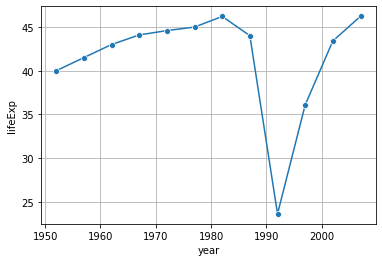

In [74]:
sns.lineplot(x='year', y='lifeExp', data=rwanda, marker='o')
plt.grid()
plt.show()

In [75]:
# 연도별 기대수명의 평균
gapminder.groupby(by='year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

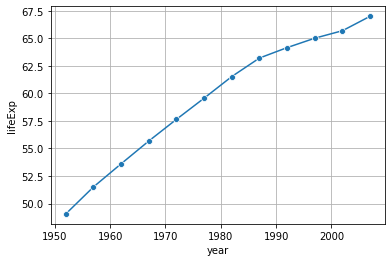

In [83]:
sns.lineplot(x='year', y='lifeExp', data=gapminder, marker='o', err_style=None)
plt.grid()
plt.show()

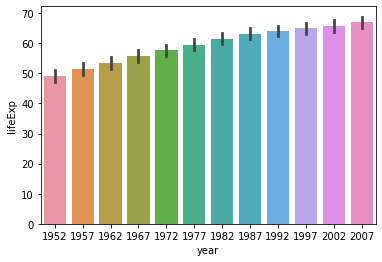

In [85]:
sns.barplot(x='year', y='lifeExp', data=gapminder)
plt.show()

In [86]:
gapminder.groupby(by='year')['gdpPercap'].mean()

year
1952     3725.276046
1957     4299.408345
1962     4725.812342
1967     5483.653047
1972     6770.082815
1977     7313.166421
1982     7518.901673
1987     7900.920218
1992     8158.608521
1997     9090.175363
2002     9917.848365
2007    11680.071820
Name: gdpPercap, dtype: float64

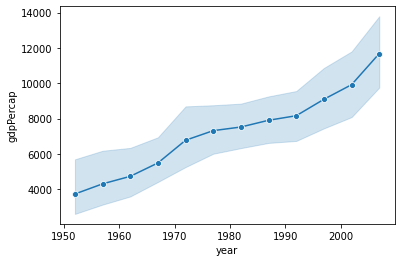

In [89]:
sns.lineplot(x='year', y='gdpPercap', data=gapminder, marker='o')
plt.show()

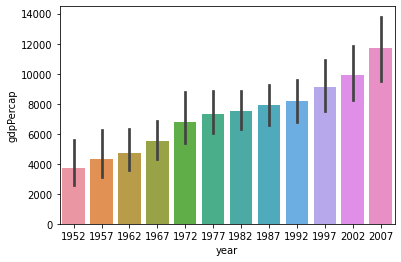

In [88]:
sns.barplot(x='year', y='gdpPercap', data=gapminder)
plt.show()

In [90]:
# 연도별 대륙별 전세계 인구
gapminder.groupby(by=['year', 'continent'])['pop'].sum()

year  continent
1952  Africa        237640501
      Americas      345152446
      Asia         1395357351
      Europe        418120846
      Oceania        10686006
1957  Africa        264837738
      Americas      386953916
      Asia         1562780599
      Europe        437890351
      Oceania        11941976
1962  Africa        296516865
      Americas      433270254
      Asia         1696357182
      Europe        460355155
      Oceania        13283518
1967  Africa        335289489
      Americas      480746623
      Asia         1905662900
      Europe        481178958
      Oceania        14600414
1972  Africa        379879541
      Americas      529384210
      Asia         2150972248
      Europe        500635059
      Oceania        16106100
1977  Africa        433061021
      Americas      578067699
      Asia         2384513556
      Europe        517164531
      Oceania        17239000
1982  Africa        499348587
      Americas      630290920
      Asia         26101

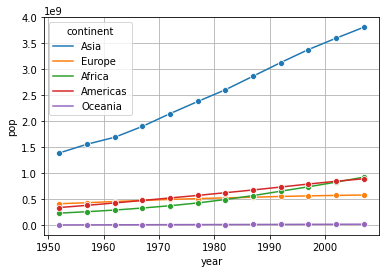

In [93]:
sns.lineplot(x='year', y='pop', hue='continent', data=gapminder, estimator=np.sum, marker='o', err_style=None)

plt.grid()
plt.show()